In [2]:
import pandas as pd

data = pd.read_csv('datasets/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv', 
                   index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-06-30 23:00:00,7.0,15.0
2019-06-30 22:00:00,20.0,30.0
2019-06-30 21:00:00,31.0,32.0
2019-06-30 20:00:00,72.0,58.0
2019-06-30 19:00:00,58.0,77.0


In [4]:
######## NOTE:##############
# can rename like this also.. See how you can use eval in your merge code
data.columns = ['West', 'East']
data['Total'] = data.eval('West+East')
data.head()

,West,East,Total
Date,,,
2019-06-30 23:00:00,7.0,15.0,22.0
2019-06-30 22:00:00,20.0,30.0,50.0
2019-06-30 21:00:00,31.0,32.0,63.0
2019-06-30 20:00:00,72.0,58.0,130.0
2019-06-30 19:00:00,58.0,77.0,135.0


In [5]:
# summary statistics
data.dropna().describe()

,West,East,Total
count,59079.000000,59079.000000,59079.000000
mean,52.382539,59.590125,111.972664
std,67.631882,86.871875,141.984104
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,15.000000
50%,29.000000,29.000000,60.000000
75%,70.000000,72.000000,146.000000
max,698.000000,850.000000,1097.000000


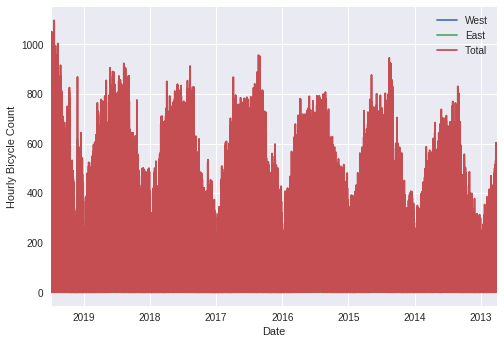

In [7]:
##### Visualizing the data

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

data.plot()
plt.ylabel('Hourly Bicycle Count')

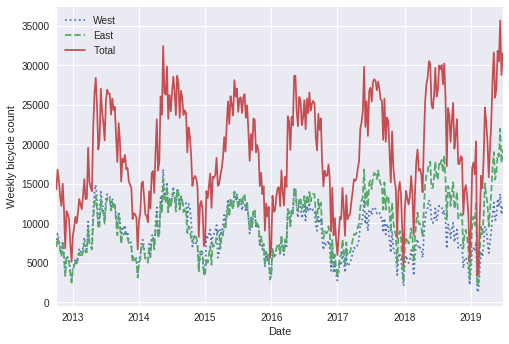

In [8]:
## can gain more insight into data by resampling the data to a coarser grid
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

'''
This shows us some interesting seasonal trends: as you might expect, people bicycle
more in the summer than in the winter, and even within a particular season the bicy‐
cle use varies from week to week (likely dependent on weather)
'''

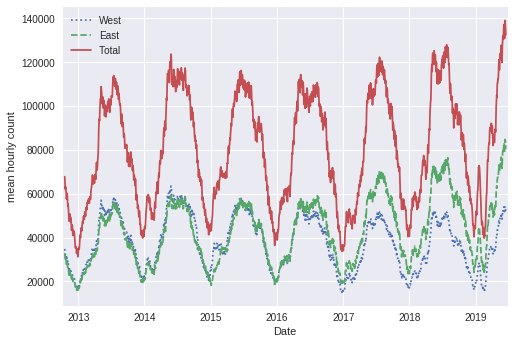

In [9]:
## use a 30-day rolling mean making sure to center the window

daily = data.resample('D').sum()
# center=True sets the label at the center of the window
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')


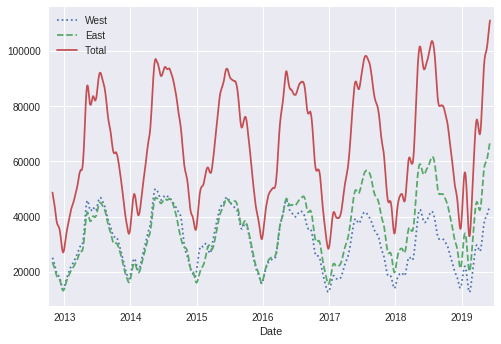

In [10]:
'''
The jaggedness of the result is due to the hard cutoff of the window. We can get a
smoother version of a rolling mean using a window function—for example, a Gaus‐
sian window.
'''

daily.rolling(50, center=True,
             win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

              West      East      Total
00:00:00  5.012591  6.663282  11.675873
01:00:00  2.800569  3.365150   6.165719
02:00:00  1.985755  2.084249   4.070004
03:00:00  1.554021  1.434200   2.988221
04:00:00  3.540617  3.082453   6.623071


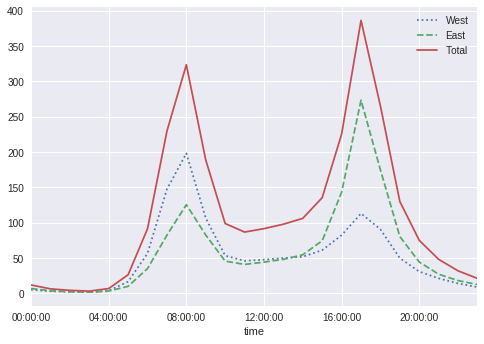

In [13]:
### Look at the average traffic as a function of the time of day.
import numpy as np

by_time = data.groupby(data.index.time).mean()

hourly_ticks = 4 * 60 * 60 * np.arange(6) ### ????

by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])


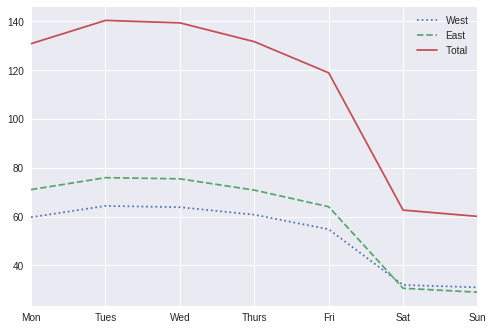

In [14]:
## See how things change based on the day of the week

by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

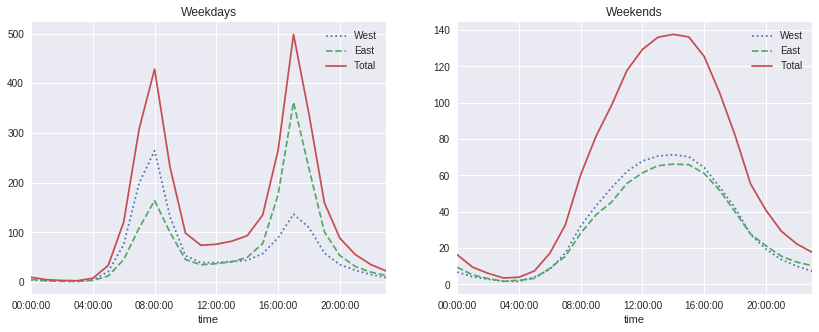

In [16]:
### Look at hourly trend on weekdays vs weekends
## Start by grouping by both a flag marking the weekend and the time of day

weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend') ## weekdays starting from 0 (Monday)
by_time = data.groupby([weekend, data.index.time]).mean()

fig, ax = plt.subplots(1, 2, figsize=(14,5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                          xticks=hourly_ticks, style=[':', '--', '-'])

by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                          xticks=hourly_ticks, style=[':', '--', '-']);

############ !!!!!!!!!! NOTE !!!!!!!!!!!!!!!!! ############
'''
Go through thie below and try to replicate and then further improve/add new features

https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/
'''